# Variance Bias Trade off




Cada estimador tiene sus ventajas y desventajas. Su error de generalización se puede descomponer en términos de sesgo, varianza y ruido. El **sesgo** de un estimador es su error promedio para diferentes conjuntos de entrenamiento. La **varianza** de un estimador indica qué tan sensible es a conjuntos de entrenamiento variables. El ruido es una propiedad de los datos.

El sesgo y la varianza son propiedades inherentes de los estimadores y generalmente tenemos que seleccionar algoritmos de aprendizaje e hiperparámetros para que tanto el sesgo como la varianza sean lo más bajos posible. Otra forma de reducir la varianza de un modelo es utilizar más datos de entrenamiento. Sin embargo, solo debe recopilar más datos de entrenamiento si la función verdadera es demasiado compleja para ser aproximada por un estimador con una varianza más baja.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [ ]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

1.22.4
1.4.4
3.9.16 (main, Dec  7 2022, 01:11:51) 
[GCC 9.4.0]
1.2.2


Automatically created module for IPython interactive environment


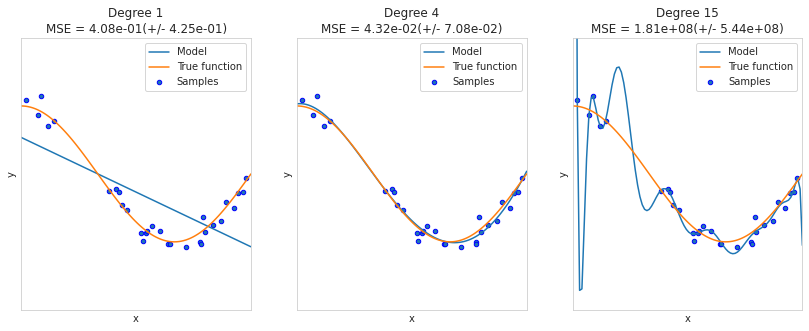

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()


***

# Validation Curve

* Para la identificación de sobreajuste y subajuste
* Graficar puntuaciones de entrenamiento y validación en función de los parámetros del modelo.



## Validation Curve for Ridge Regression

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
seaborn.set_style('whitegrid')

In [ ]:
np.logspace(-5, 2, 10)

array([1.00000000e-05, 5.99484250e-05, 3.59381366e-04, 2.15443469e-03,
       1.29154967e-02, 7.74263683e-02, 4.64158883e-01, 2.78255940e+00,
       1.66810054e+01, 1.00000000e+02])

In [ ]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

np.random.seed(0)
iris = load_iris()
X, y = iris.data, iris.target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]
param_name = "alpha"
param_range = np.logspace(-5, 2, 10)

train_scores, valid_scores = validation_curve(Ridge(),
                                              X,
                                              y,
                                              param_name,
                                              param_range,
                                              scoring='r2',
                                              cv = 5)
print(train_scores)
print(valid_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

TypeError: ignored

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter alpha')
plt.ylabel('R2')
#plt.ylim([0.8, 1.0])
plt.show()

NameError: ignored

<Figure size 720x576 with 0 Axes>

***

## [Plotting Validation Curve](http://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py)

En esta gráfica se pueden observar las puntuaciones de entrenamiento y validación de una SVM para diferentes valores del parámetro del kernel gamma.

Para valores muy bajos de gamma, se puede ver que tanto la puntuación de entrenamiento como la de validación son bajas. Esto se llama **subajuste**.

Valores medios de gamma resultarán en valores altos para ambas puntuaciones, es decir, el clasificador está funcionando bastante bien.

Si gamma es demasiado alto, el clasificador **sobreajustará**, lo que significa que la puntuación de entrenamiento es buena pero la de validación es pobre.

In [ ]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

param_range = np.logspace(-6, -1, 10)
train_scores, test_scores = validation_curve(SVC(), X, y, param_name="gamma", param_range=param_range,
                                             cv=10, scoring="accuracy", n_jobs=1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


Automatically created module for IPython interactive environment


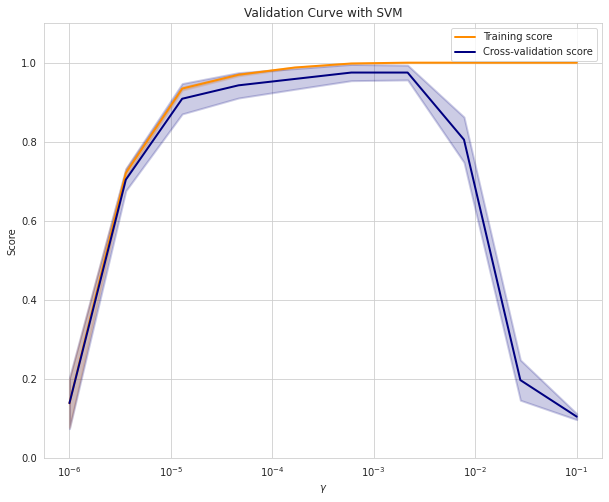

In [ ]:
plt.figure(figsize=(10,8))
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

***

# Learning Curve

* Muestra la puntuación de validación y entrenamiento de un estimador para distintos números de muestras de entrenamiento.

* Una herramienta para descubrir cuánto beneficio obtenemos al añadir más datos de entrenamiento y si el estimador sufre más de un error de varianza o de sesgo.

* Si tanto la puntuación de validación como la de entrenamiento convergen a un valor demasiado bajo con el aumento del tamaño del conjunto de entrenamiento, no obtendremos mucho beneficio de más datos de entrenamiento.


A continuación se muestra un ejemplo de una buena curva de aprendizaje que equilibra la varianza y el sesgo.

* El nivel real de rendimiento (por ejemplo, precisión o puntuación $R^2$) alcanzado está cerca del nivel deseado de rendimiento.

* La curva de entrenamiento y la de prueba (curva de validación) están ajustadas y convergen a un nivel similar."

<img src="./img/var_bias_Good.PNG"  height=50%, width=50%>

A continuación se muestra un ejemplo de una curva de aprendizaje con Alto Sesgo.

* Baja precisión / puntuación en entrenamiento y prueba. Es decir, no ajusta bien los datos de entrenamiento.
* El nivel real de rendimiento (por ejemplo, precisión o puntuación $R^2$) está lejos del nivel deseado de rendimiento.

Para abordar esto, se puede:

*Aumentar el número de parámetros - Agregar o crear nuevas características
* Disminuir la regularización."


<img src="./img/var_bias_Bias.PNG"  height=50%, width=50%>

A continuación se muestra un ejemplo de una curva de aprendizaje de alta varianza.

* El nivel de entrenamiento y prueba no convergen o convergen lentamente.
* El nivel de entrenamiento y prueba todavía están muy alejados. Es decir, este es un ejemplo de sobreajuste.

Abordar mediante:

* Recopilar más datos de entrenamiento.
* Reducir la complejidad del modelo.
* Aumentar la regularización.

<img src="./img/var_bias_Variance.PNG" height=50%, width=50%>



#### En resumen, buscamos:

* **Bias**
   * Evaluar a través del puntaje / nivel de precisión.

* **Varianza**
   * Evaluar mediante la velocidad de convergencia y la distancia entre el puntaje / nivel de precisión de entrenamiento y el puntaje / nivel de precisión de prueba.


***

## Learning Curves Example

El siguiente ejemplo es tomado del sitio web de documentación de scikit-learn:

**Observaciones generales de las curvas de aprendizaje:**

  * El puntaje de entrenamiento es muy alto al principio y disminuye
  * El puntaje de validación cruzada es muy bajo al principio y aumenta

**Observaciones clave para el clasificador Naive Bayes:**

  * Tanto el puntaje de entrenamiento como el puntaje de validación cruzada no son muy buenos al final

**Observación clave para SVM:**

  * El puntaje de entrenamiento aún se encuentra alrededor del máximo
  * El puntaje de validación podría aumentar con más muestras de entrenamiento.

Automatically created module for IPython interactive environment


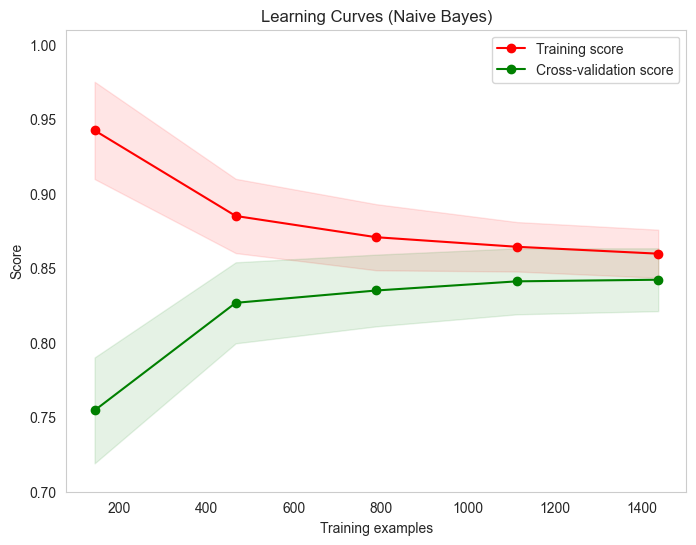

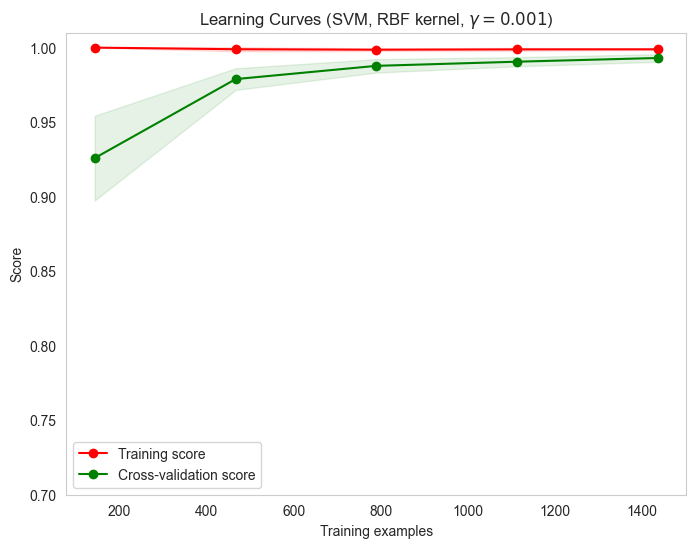

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(8,6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target


title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y,
                    ylim=(0.7, 1.01),
                    cv=cv,
                    n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()

***

# Where to From Here?

* [Scikit learn](http://scikit-learn.org/stable/modules/learning_curve.html)

* [Machine Learning Master](https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/)

* [Elite Data Science](https://elitedatascience.com/bias-variance-tradeoff)

***

# Exercise - Boston Housing

## Learning Curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize=(10, 8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


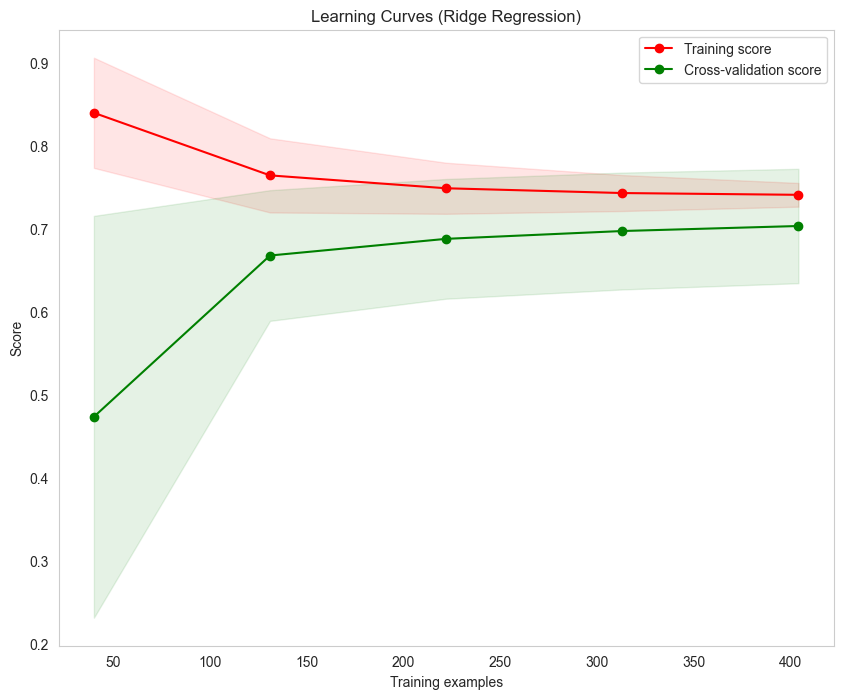

In [ ]:
boston = load_boston()
X, y = boston.data, boston.target

title = "Learning Curves (Ridge Regression)"

# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = Ridge()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)
plt.show()

## Validation Curve

In [ ]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge

np.random.seed(0)
boston = load_boston()
X, y = boston.data, boston.target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]
param_name = "alpha"
param_range = np.logspace(-5, 2, 10)

train_scores, valid_scores = validation_curve(Ridge(),
                                              X,
                                              y,
                                              param_name,
                                              param_range)
print(train_scores)
print(valid_scores)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(valid_scores, axis=1)
test_std = np.std(valid_scores, axis=1)

[[0.77301356 0.72917058 0.74897081 0.75658611 0.70497483]
 [0.77301356 0.72917058 0.74897081 0.75658611 0.70497483]
 [0.77301356 0.72917058 0.74897081 0.75658611 0.70497483]
 [0.77301353 0.72917054 0.74897077 0.75658608 0.70497479]
 [0.77301247 0.72916919 0.74896965 0.756585   0.70497354]
 [0.77297842 0.72912518 0.74893331 0.75655037 0.70493287]
 [0.77228874 0.7281616  0.74817798 0.75582878 0.7040692 ]
 [0.76863902 0.72215205 0.74391411 0.75177776 0.6990457 ]
 [0.76406744 0.71459653 0.7375499  0.74641495 0.69322072]
 [0.75112197 0.70098401 0.71983959 0.72934545 0.68236377]]
[[0.58922226 0.77799155 0.66791982 0.66801623 0.83953314]
 [0.58922165 0.77799206 0.66791997 0.66801588 0.83953301]
 [0.58921796 0.77799515 0.66792085 0.66801378 0.83953223]
 [0.58919587 0.77801364 0.66792606 0.66800121 0.83952755]
 [0.58906345 0.77812273 0.66795565 0.66792568 0.83949885]
 [0.58827374 0.77871876 0.66808144 0.66746987 0.83930713]
 [0.58399654 0.78090531 0.66788935 0.66490384 0.83783917]
 [0.57206631 

C:\Users\osval\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass param_name=alpha, param_range=[1.00000000e-05 5.99484250e-05 3.59381366e-04 2.15443469e-03
 1.29154967e-02 7.74263683e-02 4.64158883e-01 2.78255940e+00
 1.66810054e+01 1.00000000e+02] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


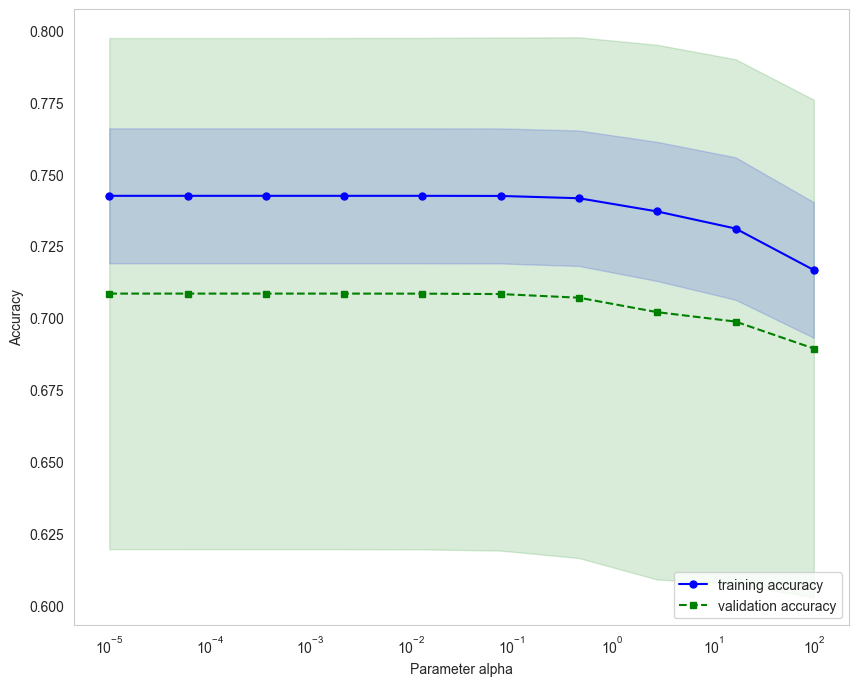

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter alpha')
plt.ylabel('Accuracy')
#plt.ylim([0.8, 1.0])
plt.show()

***